In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re


In [2]:
product=pd.read_csv(r'C:\Users\roshn\data_visualiasation_and_ML\ProductsData.csv',encoding='latin1')

In [3]:
product.head()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
0,"""chambre a coucher ""","""40008817""","""Meubles et décoration """,1 800,"""private""","""Grand Casablanca""","""Casablanca"""
1,"""Comte free fire""","""40008816""","""Jeux vidéo et consoles """,,"""private""","""Grand Casablanca""","""Casablanca"""
2,"""Iphone 6 plus""","""40008815""","""Téléphones """,,"""private""","""Grand Casablanca""","""Casablanca"""
3,"""Renault ""","""40008814""","""Voitures """,,"""private""","""Chaouia-Ouardigha""","""Settat"""
4,"""PS3 SLIM 360 GB ""","""40008812""","""Jeux vidéo et consoles """,1 400,"""private""","""Rabat-Salé-Zemmour-Zaër""","""Sala Al-Jadida"""


In [22]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4350 entries, 0 to 4349
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Product_name              4350 non-null   object
 1   Product_id                4350 non-null   object
 2   Product_Category          4350 non-null   object
 3   price                     3580 non-null   object
 4   Professional_Publication  4350 non-null   object
 5   Region_address            4350 non-null   object
 6   Local_address             4350 non-null   object
dtypes: object(7)
memory usage: 238.0+ KB


In [28]:
# removing the quotes from every value
for i, col in enumerate(product.columns):
    product.iloc[:, i] = product.iloc[:, i].str.replace('"', '')

In [29]:
product

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
0,chambre a coucher,40008817,Meubles et décoration,1 800,private,Grand Casablanca,Casablanca
1,Comte free fire,40008816,Jeux vidéo et consoles,,private,Grand Casablanca,Casablanca
2,Iphone 6 plus,40008815,Téléphones,,private,Grand Casablanca,Casablanca
3,Renault,40008814,Voitures,,private,Chaouia-Ouardigha,Settat
4,PS3 SLIM 360 GB,40008812,Jeux vidéo et consoles,1 400,private,Rabat-Salé-Zemmour-Zaër,Sala Al-Jadida
...,...,...,...,...,...,...,...
4345,XN-C11,39234529,Instruments de musique,90,private,Chaouia-Ouardigha,Khouribga
4346,Uno,39234527,Voitures,20 000,private,Grand Casablanca,Mohammedia
4347,???? ????????? ????? ????,39234526,Matériels professionnels,,pro,Grand Casablanca,Casablanca
4348,Poussette Bugaboo cameleon 3 black,39234524,Equipements pour enfant et bébé,1 850,private,Tanger-Tétouan,Tanger


In [30]:
# replacing empty strings with NaN
product = product.replace(r'^\s*$', np.NaN, regex=True) 

In [33]:
product

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
0,chambre a coucher,40008817,Meubles et décoration,1 800,private,Grand Casablanca,Casablanca
1,Comte free fire,40008816,Jeux vidéo et consoles,NaN,private,Grand Casablanca,Casablanca
2,Iphone 6 plus,40008815,Téléphones,NaN,private,Grand Casablanca,Casablanca
3,Renault,40008814,Voitures,NaN,private,Chaouia-Ouardigha,Settat
4,PS3 SLIM 360 GB,40008812,Jeux vidéo et consoles,1 400,private,Rabat-Salé-Zemmour-Zaër,Sala Al-Jadida
...,...,...,...,...,...,...,...
4345,XN-C11,39234529,Instruments de musique,90,private,Chaouia-Ouardigha,Khouribga
4346,Uno,39234527,Voitures,20 000,private,Grand Casablanca,Mohammedia
4347,???? ????????? ????? ????,39234526,Matériels professionnels,NaN,pro,Grand Casablanca,Casablanca
4348,Poussette Bugaboo cameleon 3 black,39234524,Equipements pour enfant et bébé,1 850,private,Tanger-Tétouan,Tanger


In [34]:
product['Product_name'] = product['Product_name'].apply(lambda x: np.nan if str(x).find('?')>-1 else x)

product['price'] = product['price'].str.replace(' ', '')

In [35]:
product

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
0,chambre a coucher,40008817,Meubles et décoration,1800,private,Grand Casablanca,Casablanca
1,Comte free fire,40008816,Jeux vidéo et consoles,NaN,private,Grand Casablanca,Casablanca
2,Iphone 6 plus,40008815,Téléphones,NaN,private,Grand Casablanca,Casablanca
3,Renault,40008814,Voitures,NaN,private,Chaouia-Ouardigha,Settat
4,PS3 SLIM 360 GB,40008812,Jeux vidéo et consoles,1400,private,Rabat-Salé-Zemmour-Zaër,Sala Al-Jadida
...,...,...,...,...,...,...,...
4345,XN-C11,39234529,Instruments de musique,90,private,Chaouia-Ouardigha,Khouribga
4346,Uno,39234527,Voitures,20000,private,Grand Casablanca,Mohammedia
4347,NaN,39234526,Matériels professionnels,NaN,pro,Grand Casablanca,Casablanca
4348,Poussette Bugaboo cameleon 3 black,39234524,Equipements pour enfant et bébé,1850,private,Tanger-Tétouan,Tanger


In [36]:
# dropping NaN values
product.dropna(inplace=True)

In [38]:
product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2894 entries, 0 to 4348
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Product_name              2894 non-null   object
 1   Product_id                2894 non-null   object
 2   Product_Category          2894 non-null   object
 3   price                     2894 non-null   object
 4   Professional_Publication  2894 non-null   object
 5   Region_address            2894 non-null   object
 6   Local_address             2894 non-null   object
dtypes: object(7)
memory usage: 180.9+ KB


In [42]:
# converting object type to numeric data type of Price
product['price'] = pd.to_numeric(product['price'], errors='coerce')

In [43]:
product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2894 entries, 0 to 4348
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Product_name              2894 non-null   object
 1   Product_id                2894 non-null   object
 2   Product_Category          2894 non-null   object
 3   price                     2894 non-null   int64 
 4   Professional_Publication  2894 non-null   object
 5   Region_address            2894 non-null   object
 6   Local_address             2894 non-null   object
dtypes: int64(1), object(6)
memory usage: 180.9+ KB


In [44]:
product.head()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
0,chambre a coucher,40008817,Meubles et décoration,1800,private,Grand Casablanca,Casablanca
4,PS3 SLIM 360 GB,40008812,Jeux vidéo et consoles,1400,private,Rabat-Salé-Zemmour-Zaër,Sala Al-Jadida
5,Need For Speed Heat Xbox One Neuf,39955729,Jeux vidéo et consoles,549,pro,Grand Casablanca,Casablanca
7,Nikel,40008809,Voitures,75000,private,Gharb-Chrarda-Beni Hssen,Kénitra
8,compte free fire,40008808,Jeux vidéo et consoles,170,private,Grand Casablanca,Casablanca


In [73]:
# top 5 expensive products
product.sort_values('price',ascending=False).head(5)

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
1351,villa avec piscine neuve en Vente à Tanger centre,39793364,Maisons et villas,5000000,private,Tanger-Tétouan,Tanger
2725,maison commercial,39240902,Maisons et villas,4500000,private,Souss-Massa-Drâa,Ait Melloul
4232,VILLA A AIN SEBAA,39234834,Maisons et villas,3200000,private,Grand Casablanca,Casablanca
914,VILLA À VENDRE,40008014,Maisons et villas,2700000,private,Rabat-Salé-Zemmour-Zaër,Salé
314,Villa à vendre avec tt l'ameublement,39457983,Maisons et villas,2500000,private,Souss-Massa-Drâa,Agadir


In [74]:
# 5 least expensive products
product.sort_values('price',ascending=True).head(5)

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
3389,outillage usinage,39237038,Matériels professionnels,1,private,Grand Casablanca,Mohammedia
2664,smart balance wheel hoverboard,39241125,Sports et loisirs,1,private,Marrakech-Tensift-Al Haouz,Marrakech
3263,aprelia 150cc,39237246,Motos,1,private,Rabat-Salé-Zemmour-Zaër,Rabat
3906,Lit pour fille,39235449,Meubles et décoration,1,private,Grand Casablanca,Dar Bouazza
2186,Relax pour bebe jdid,39242385,Equipements pour enfant et bébé,1,private,Marrakech-Tensift-Al Haouz,Marrakech


This infers that the private publication has both most expensive and cheap products

### count of private and pro professional publications

In [53]:
product['Professional_Publication'].value_counts()

private    1827
pro        1067
Name: Professional_Publication, dtype: int64

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='Professional_Publication', ylabel='count'>

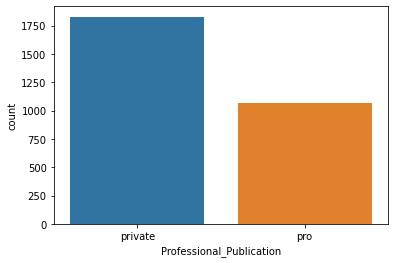

In [56]:
sns.countplot(x='Professional_Publication',data=product)

<AxesSubplot:xlabel='count', ylabel='Region_address'>

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)


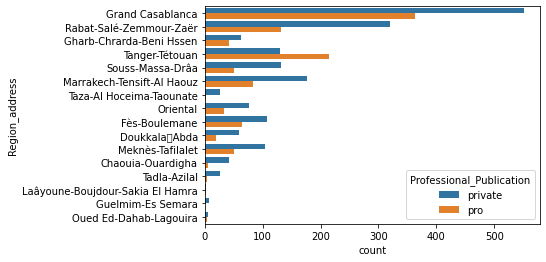

In [64]:
sns.countplot(y='Region_address',data=product,hue='Professional_Publication')

This shows max number of pro and private products are sold in Grand Casablanca

<AxesSubplot:xlabel='count', ylabel='Local_address'>

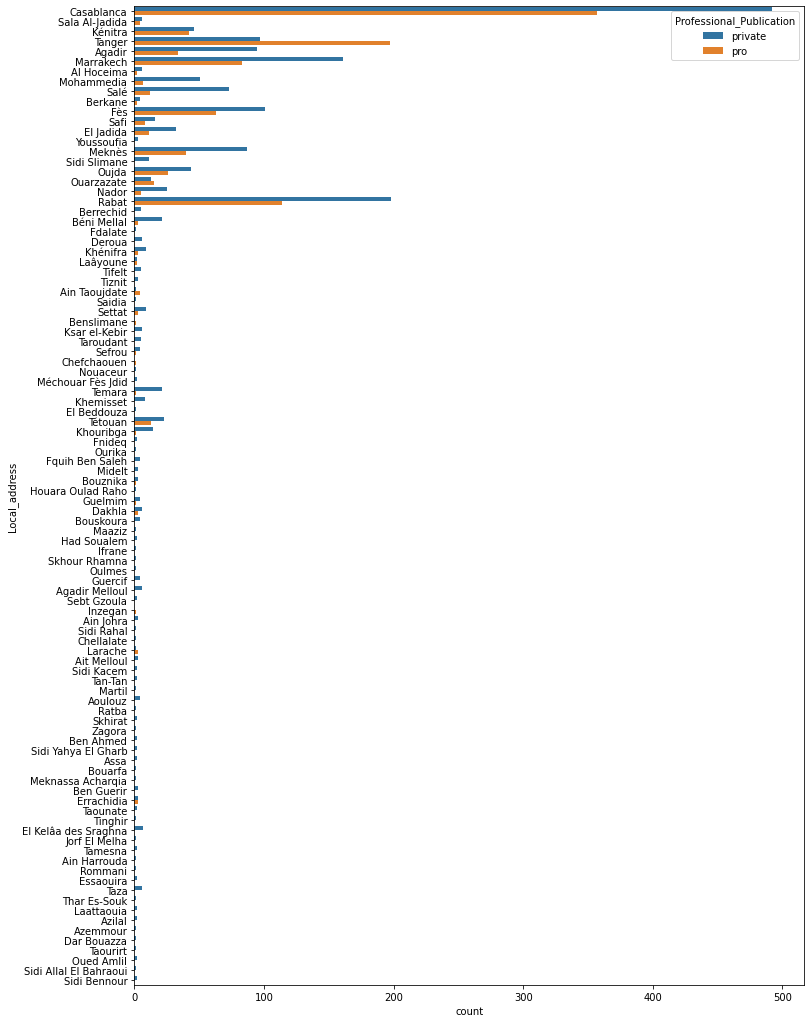

In [68]:
plt.figure(figsize=(12,18))
sns.countplot(y='Local_address',data=product,hue='Professional_Publication')

This shows max number of pro and private products are sold in Casablanca

<AxesSubplot:xlabel='Professional_Publication', ylabel='price'>

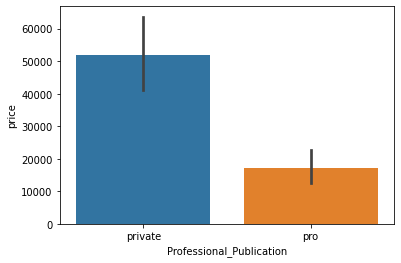

In [70]:
sns.barplot(x='Professional_Publication',y='price',data=product)

Private publication products are costlier than pro publications

<AxesSubplot:xlabel='price', ylabel='Region_address'>

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)


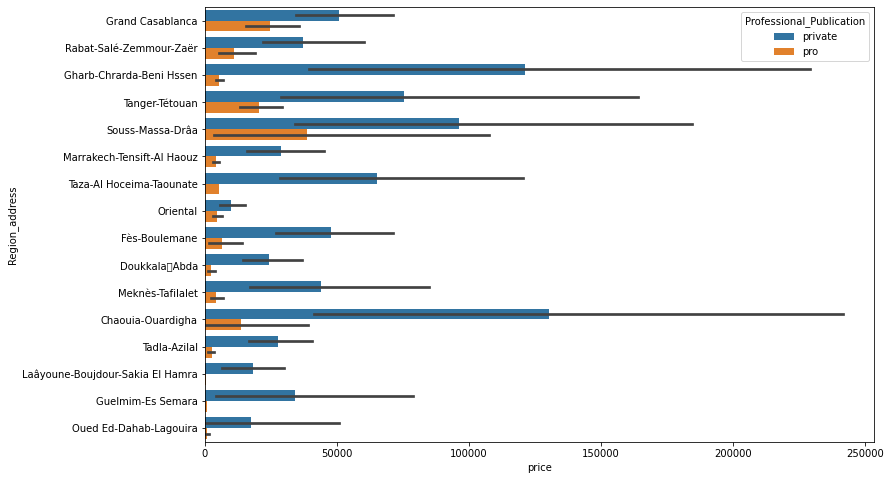

In [76]:
plt.figure(figsize=(12,8))
sns.barplot(x='price',y='Region_address',data=product,hue='Professional_Publication')

Chaouia-Ouardigha region has most expensive private products sold

<AxesSubplot:xlabel='Professional_Publication', ylabel='price'>

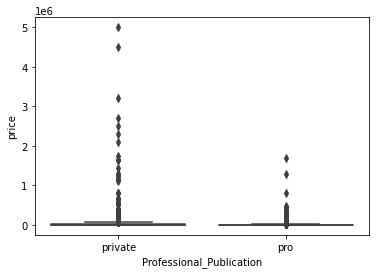

In [82]:
sns.boxplot(x='Professional_Publication',y='price',data=product)

private publication has most outliers

In [4]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

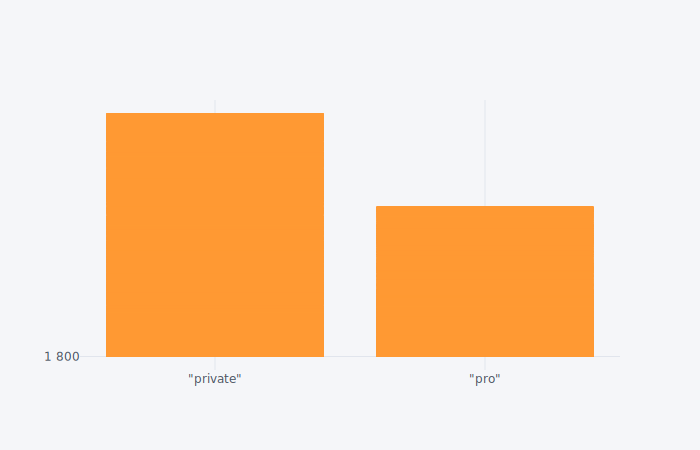

In [7]:
import plotly.io as pio
pio.renderers.default = "svg"
product.iplot(kind='bar',x='Professional_Publication',y='price')

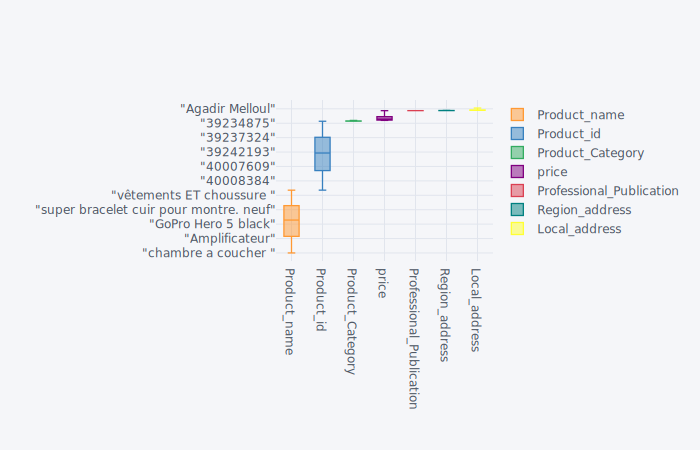

In [8]:
import plotly.io as pio
pio.renderers.default = "svg"
product.iplot(kind='box')